# Marketing campain analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
marketing = pd.read_csv('datasets/marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

In [3]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [4]:
marketing.shape

(10037, 12)

There are some observations with a False value on the variable converted and a True value on the variable is_retained. That doesn't make sense. 

In [5]:
marketing[(marketing['converted']==False) & (marketing['is_retained']==True)].count()

user_id                578
date_served            578
marketing_channel      578
variant                578
converted              578
language_displayed     578
language_preferred     578
age_group              578
date_subscribed        578
date_canceled            0
subscribing_channel    578
is_retained            578
dtype: int64

In [6]:
marketing.shape

(10037, 12)

In [7]:
indexes = marketing[(marketing['converted']==False) & (marketing['is_retained']==True)].index
marketing.drop(indexes, inplace=True)

In [8]:
marketing.shape

(9459, 12)

In [9]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9459 entries, 0 to 10035
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              9459 non-null   object        
 1   date_served          9443 non-null   datetime64[ns]
 2   marketing_channel    9444 non-null   object        
 3   variant              9459 non-null   object        
 4   converted            9444 non-null   object        
 5   language_displayed   9459 non-null   object        
 6   language_preferred   9459 non-null   object        
 7   age_group            9459 non-null   object        
 8   date_subscribed      1278 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1278 non-null   object        
 11  is_retained          1278 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 960.7+ KB


In [10]:
marketing.isnull().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                15
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          8882
subscribing_channel    8181
is_retained            8181
dtype: int64

In [11]:
marketing['converted'].value_counts(dropna=False)

False    8368
True     1076
NaN        15
Name: converted, dtype: int64

In [12]:
marketing['marketing_channel'].value_counts(dropna=False)

House Ads    4404
Instagram    1791
Facebook     1766
Push          944
Email         539
NaN            15
Name: marketing_channel, dtype: int64

## General retention rate

In [13]:
subscribers = marketing[marketing['converted']==True]['user_id'].nunique()
subscribers

1015

In [14]:
retained = marketing[marketing['is_retained']==True]['user_id'].nunique()
retained

655

In [15]:
retention_rate = retained/subscribers
retention_rate

0.645320197044335

## Segmentation by channel
### Retention rate

In [16]:
retained = marketing[marketing['is_retained']==True].groupby(['subscribing_channel'])['user_id'].nunique()
retained

subscribing_channel
Email        118
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64

In [17]:
subscribers = marketing[marketing['converted']==True].groupby(['subscribing_channel'])['user_id'].nunique()
subscribers

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

In [18]:
channel_retention_rate = retained/subscribers
round(channel_retention_rate*100, 2)

subscribing_channel
Email        73.29
Facebook     68.78
House Ads    58.05
Instagram    68.10
Push         70.13
Name: user_id, dtype: float64

## Segmentation by language
### Conversion rate

In [19]:
total = marketing.groupby(['language_displayed'])['user_id'].nunique()
total

language_displayed
Arabic       22
English    7150
German       68
Spanish     109
Name: user_id, dtype: int64

In [20]:
subscribers = marketing[marketing['converted']==True].groupby(['language_displayed'])['user_id'].nunique()
subscribers

language_displayed
Arabic      12
English    926
German      53
Spanish     24
Name: user_id, dtype: int64

In [21]:
language_conversion_rate = subscribers/total
round(language_conversion_rate*100, 2)

language_displayed
Arabic     54.55
English    12.95
German     77.94
Spanish    22.02
Name: user_id, dtype: float64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

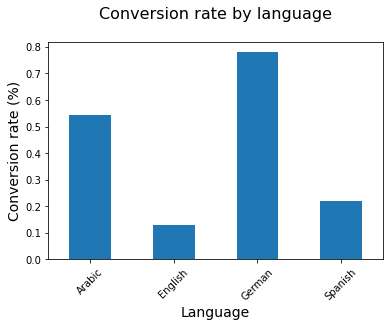

In [22]:
language_conversion_rate.plot(kind='bar')
plt.title('Conversion rate by language\n', size=16)
plt.xlabel('Language', size=14)
plt.ylabel('Conversion rate (%)', size=14)
plt.xticks(rotation=45)

## Segmentation by date
### Conversion rate

In [23]:
total = marketing.groupby(['date_served'])['user_id'].nunique()
total

date_served
2018-01-01    337
2018-01-02    321
2018-01-03    317
2018-01-04    307
2018-01-05    307
2018-01-06    297
2018-01-07    262
2018-01-08    303
2018-01-09    300
2018-01-10    312
2018-01-11    298
2018-01-12    290
2018-01-13    299
2018-01-14    302
2018-01-15    705
2018-01-16    373
2018-01-17    360
2018-01-18    310
2018-01-19    297
2018-01-20    303
2018-01-21    218
2018-01-22    169
2018-01-23    162
2018-01-24    182
2018-01-25    178
2018-01-26    219
2018-01-27    308
2018-01-28    306
2018-01-29    304
2018-01-30    301
2018-01-31    332
Name: user_id, dtype: int64

In [24]:
subscribers = marketing[marketing['converted']==True].groupby(['date_served'])['user_id'].nunique()
subscribers

date_served
2018-01-01    36
2018-01-02    37
2018-01-03    36
2018-01-04    35
2018-01-05    40
2018-01-06    35
2018-01-07    39
2018-01-08    36
2018-01-09    39
2018-01-10    40
2018-01-11    25
2018-01-12    23
2018-01-13    26
2018-01-14    26
2018-01-15    87
2018-01-16    99
2018-01-17    81
2018-01-18    29
2018-01-19    18
2018-01-20    21
2018-01-21    20
2018-01-22    22
2018-01-23    21
2018-01-24    22
2018-01-25    23
2018-01-26    20
2018-01-27    21
2018-01-28    20
2018-01-29    19
2018-01-30    21
2018-01-31    18
Name: user_id, dtype: int64

In [25]:
daily_conversion_rate = subscribers/total
daily_conversion_rate.head()

date_served
2018-01-01    0.106825
2018-01-02    0.115265
2018-01-03    0.113565
2018-01-04    0.114007
2018-01-05    0.130293
Name: user_id, dtype: float64

In [26]:
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index())
daily_conversion_rate.head()

,date_served,user_id
0,2018-01-01,0.106825
1,2018-01-02,0.115265
2,2018-01-03,0.113565
3,2018-01-04,0.114007
4,2018-01-05,0.130293


In [27]:
daily_conversion_rate.columns = ['date_subscribed', 'conversion_rate']
daily_conversion_rate.head()

,date_subscribed,conversion_rate
0,2018-01-01,0.106825
1,2018-01-02,0.115265
2,2018-01-03,0.113565
3,2018-01-04,0.114007
4,2018-01-05,0.130293


(0.0, 0.275975483704254)

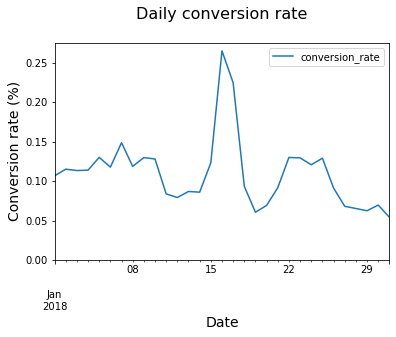

In [28]:
daily_conversion_rate.plot('date_subscribed', 'conversion_rate')
plt.title('Daily conversion rate\n', size=16)
plt.xlabel('Date', size=14)
plt.ylabel('Conversion rate (%)', size=14)
plt.ylim(0)

### Retention rate

In [29]:
total = marketing.groupby(['date_subscribed'])['user_id'].nunique()
total

date_subscribed
2018-01-01    36
2018-01-02    37
2018-01-03    37
2018-01-04    35
2018-01-05    40
2018-01-06    36
2018-01-07    38
2018-01-08    36
2018-01-09    39
2018-01-10    40
2018-01-11    26
2018-01-12    23
2018-01-13    26
2018-01-14    26
2018-01-15    64
2018-01-16    99
2018-01-17    82
2018-01-18    29
2018-01-19    18
2018-01-20    21
2018-01-21    20
2018-01-22    22
2018-01-23    21
2018-01-24    23
2018-01-25    23
2018-01-26    20
2018-01-27    21
2018-01-28    21
2018-01-29    19
2018-01-30    21
2018-01-31    18
Name: user_id, dtype: int64

In [30]:
retained = marketing[marketing['is_retained']==True].groupby(['date_subscribed'])['user_id'].nunique()
retained

date_subscribed
2018-01-01    28
2018-01-02    26
2018-01-03    27
2018-01-04    17
2018-01-05    23
2018-01-06    27
2018-01-07    20
2018-01-08    23
2018-01-09    26
2018-01-10    27
2018-01-11    16
2018-01-12     9
2018-01-13    13
2018-01-14    16
2018-01-15    44
2018-01-16    68
2018-01-17    49
2018-01-18    21
2018-01-19    12
2018-01-20    17
2018-01-21    15
2018-01-22    17
2018-01-23    15
2018-01-24    15
2018-01-25    13
2018-01-26    16
2018-01-27    12
2018-01-28    14
2018-01-29    14
2018-01-30    15
2018-01-31    12
Name: user_id, dtype: int64

In [31]:
daily_retention_rate = retained/total
daily_retention_rate

date_subscribed
2018-01-01    0.777778
2018-01-02    0.702703
2018-01-03    0.729730
2018-01-04    0.485714
2018-01-05    0.575000
2018-01-06    0.750000
2018-01-07    0.526316
2018-01-08    0.638889
2018-01-09    0.666667
2018-01-10    0.675000
2018-01-11    0.615385
2018-01-12    0.391304
2018-01-13    0.500000
2018-01-14    0.615385
2018-01-15    0.687500
2018-01-16    0.686869
2018-01-17    0.597561
2018-01-18    0.724138
2018-01-19    0.666667
2018-01-20    0.809524
2018-01-21    0.750000
2018-01-22    0.772727
2018-01-23    0.714286
2018-01-24    0.652174
2018-01-25    0.565217
2018-01-26    0.800000
2018-01-27    0.571429
2018-01-28    0.666667
2018-01-29    0.736842
2018-01-30    0.714286
2018-01-31    0.666667
Name: user_id, dtype: float64

In [32]:
daily_retention_rate = pd.DataFrame(daily_retention_rate.reset_index())
daily_retention_rate.columns = ['date_subscribed', 'retention_rate']
daily_retention_rate.head()

,date_subscribed,retention_rate
0,2018-01-01,0.777778
1,2018-01-02,0.702703
2,2018-01-03,0.729730
3,2018-01-04,0.485714
4,2018-01-05,0.575000


(0.0, 0.8304347826086956)

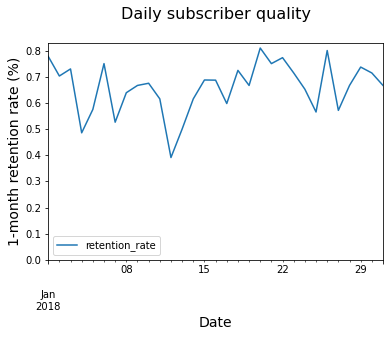

In [33]:
daily_retention_rate.plot('date_subscribed', 'retention_rate')
plt.title('Daily subscriber quality\n', size=16)
plt.xlabel('Date', size=14)
plt.ylabel('1-month retention rate (%)', size=14)
plt.ylim(0)

## Prefered language over time

In [34]:
language = marketing.groupby(['date_served', 'language_preferred'])['user_id'].nunique()
language

date_served  language_preferred
2018-01-01   Arabic                  4
             English               319
             German                  5
             Spanish                 9
2018-01-02   Arabic                  4
                                  ... 
2018-01-30   Spanish                17
2018-01-31   Arabic                  8
             English               303
             German                  5
             Spanish                16
Name: user_id, Length: 121, dtype: int64

In [35]:
language = pd.DataFrame(language.unstack(level=1))
language.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,319.0,5.0,9.0
2018-01-02,4.0,302.0,5.0,10.0
2018-01-03,3.0,304.0,3.0,7.0
2018-01-04,2.0,289.0,2.0,14.0
2018-01-05,1.0,292.0,1.0,14.0


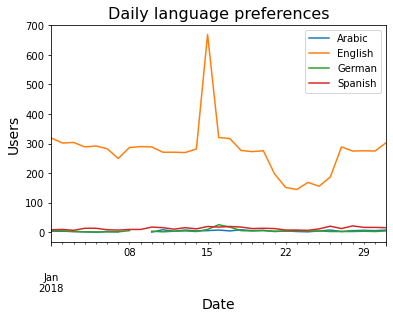

In [36]:
language.plot()
plt.title('Daily language preferences', size=16)
plt.xlabel('Date', size=14)
plt.ylabel('Users', size=14)
plt.legend(loc='upper right', labels=language.columns.values)

## Daily language preferences

In [37]:
language = marketing.groupby(['date_served', 'language_preferred'])['user_id'].nunique()

In [38]:
language.head()

date_served  language_preferred
2018-01-01   Arabic                  4
             English               319
             German                  5
             Spanish                 9
2018-01-02   Arabic                  4
Name: user_id, dtype: int64

In [39]:
language = pd.DataFrame(language.unstack(level=1))

In [40]:
language.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,319.0,5.0,9.0
2018-01-02,4.0,302.0,5.0,10.0
2018-01-03,3.0,304.0,3.0,7.0
2018-01-04,2.0,289.0,2.0,14.0
2018-01-05,1.0,292.0,1.0,14.0


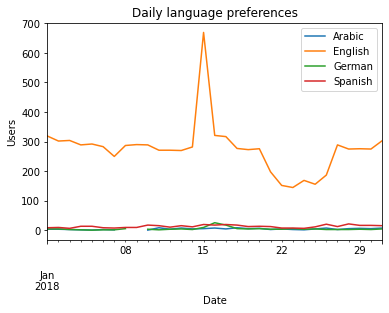

In [41]:
language.plot()
plt.title('Daily language preferences')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc='upper right',
          labels = language.columns.values)

## Age group language preferences

In [42]:
language_age = marketing.groupby(['language_preferred', 'age_group'])['user_id'].count()

In [43]:
language_age.head()

language_preferred  age_group  
Arabic              0-18 years     19
                    19-24 years    26
                    24-30 years    19
                    30-36 years    19
                    36-45 years    18
Name: user_id, dtype: int64

In [44]:
language_age = pd.DataFrame(language_age.unstack(level=1))

In [45]:
language_age.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,19,26,19,19,18,21,21
English,1326,1455,1334,1183,1195,1171,1065
German,29,28,33,16,19,25,11
Spanish,67,62,69,65,50,61,52


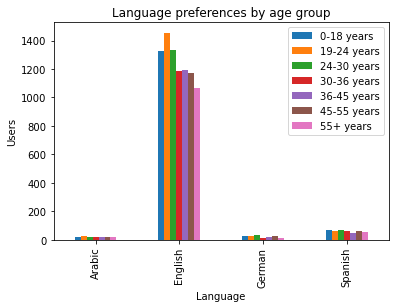

In [46]:
language_age.plot(kind='bar')
plt.title('Language preferences by age group')
plt.xlabel('Language')
plt.ylabel('Users')
plt.legend(loc = 'upper right')

## Marketing channels across age groups

In [47]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

In [48]:
channel_age_df = pd.DataFrame(channel_age.unstack(level=1))

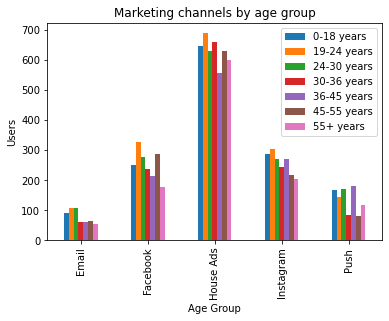

In [49]:
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)

## Retention rate by date subscribed and subscribing channel

In [50]:
def retention_rate(dataframe, grouping_cols):
    # Number of retained costumers, grouped by grouping columns
    retained = dataframe[dataframe['is_retained']==True].groupby(grouping_cols)['user_id'].nunique()
    # Number of converted costumers, grouped by grouping columns
    converted = dataframe[dataframe['converted']==True].groupby(grouping_cols)['user_id'].nunique()
    
    retention_rate = retained/converted
    retention_rate = retention_rate.fillna(0)
    
    # The function returns the retention rate:
    return retention_rate

In [51]:
daily_retention = retention_rate(marketing, ['date_subscribed', 'subscribing_channel'])
daily_retention

date_subscribed  subscribing_channel
2018-01-01       Email                  1.000000
                 Facebook               0.875000
                 House Ads              0.687500
                 Instagram              0.750000
                 Push                   1.000000
                                          ...   
2018-01-31       Email                  1.000000
                 Facebook               0.833333
                 House Ads              0.500000
                 Instagram              0.666667
                 Push                   0.500000
Name: user_id, Length: 154, dtype: float64

In [52]:
daily_retention = pd.DataFrame(daily_retention.unstack(level=1))
daily_retention.head()

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
2018-01-01,1.00,0.875000,0.687500,0.750000,1.000000
2018-01-02,0.75,1.000000,0.588235,0.625000,1.000000
2018-01-03,0.00,0.800000,0.647059,0.909091,0.666667
2018-01-04,0.00,0.666667,0.466667,0.500000,0.000000
2018-01-05,1.00,0.571429,0.500000,0.636364,1.000000


In [53]:
daily_retention.loc['1/19/18']

subscribing_channel
Email             NaN
Facebook     0.600000
House Ads    0.600000
Instagram    0.666667
Push         1.000000
Name: 2018-01-19 00:00:00, dtype: float64

In [54]:
daily_retention.fillna(0, inplace=True)

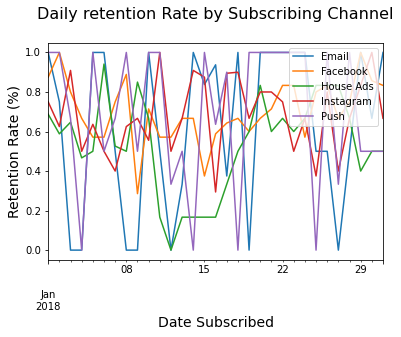

In [55]:
daily_retention.plot()
plt.title('Daily retention Rate by Subscribing Channel\n', size=16)
plt.xlabel('Date Subscribed', size=14)
plt.ylabel('Retention Rate (%)', size=14)
plt.legend(loc='upper right', labels=daily_retention.columns.values)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python38\lib\site-packages\seaborn\_decorators.py:36: Futu

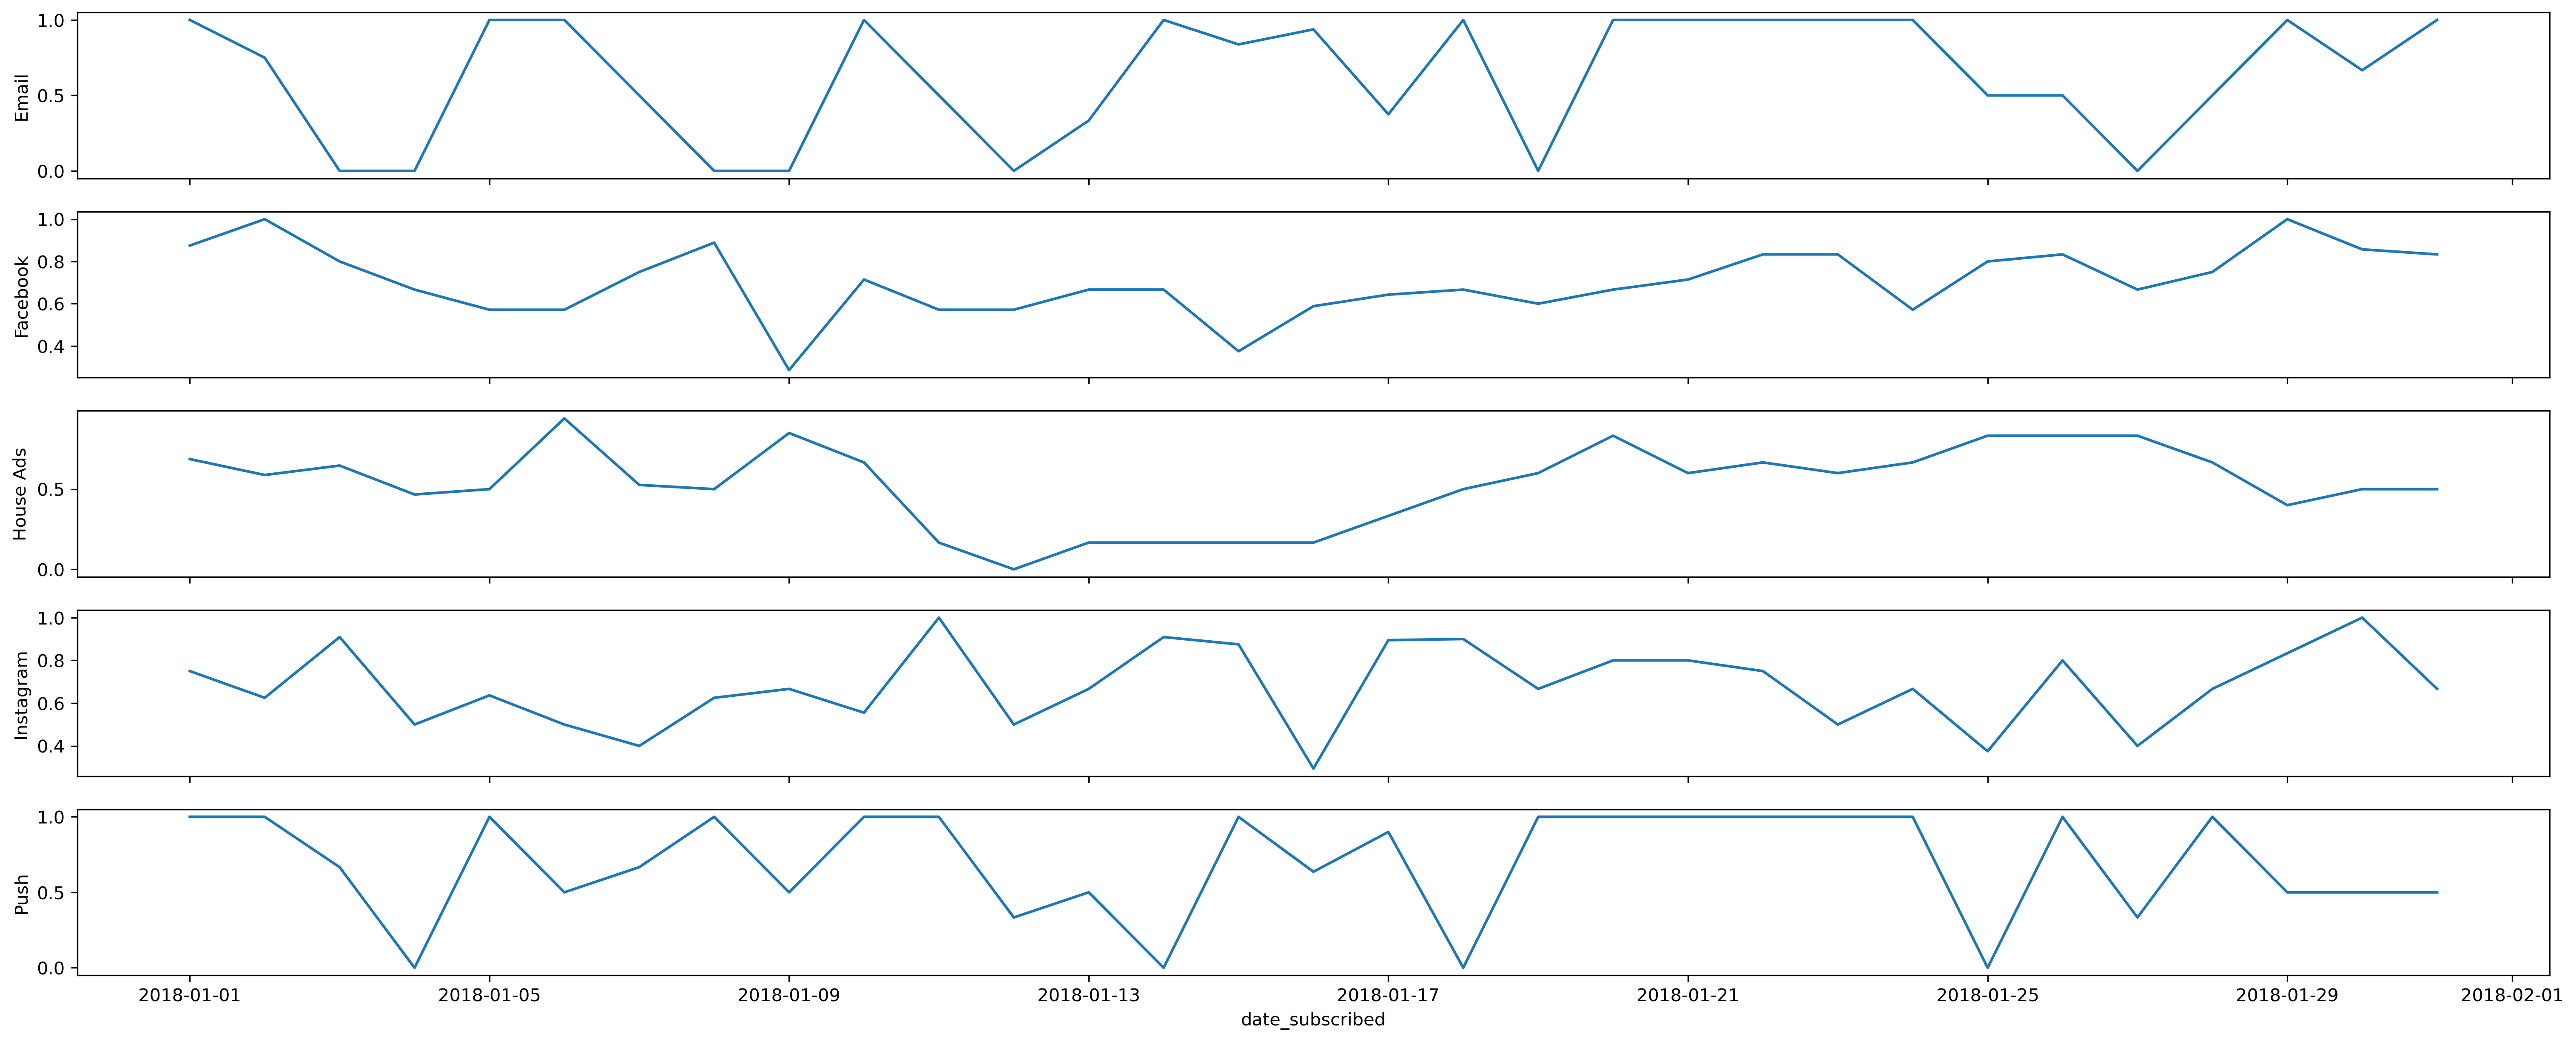

In [56]:
fig, axes = plt.subplots(5, 1, figsize=(25, 10), sharex=True, dpi=300)
i = 0
for channel in daily_retention:
    sns.lineplot(daily_retention.index, daily_retention[channel], ax=axes[i])
    i+=1

In [57]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()

    # Conversion rate 
    conversion_rate = column_conv/column_total

    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [58]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
age_group_conv

date_served  age_group  
2018-01-01   0-18 years     0.173077
             19-24 years    0.206897
             24-30 years    0.117647
             30-36 years    0.044444
             36-45 years    0.044444
                              ...   
2018-01-31   24-30 years    0.060000
             30-36 years    0.000000
             36-45 years    0.035714
             45-55 years    0.023810
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64

In [59]:
# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

Text(0.5, 0, 'Age group')

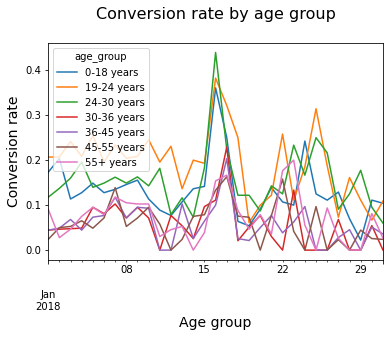

In [60]:
# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python38\lib\site-packages\seaborn\_decorators.py:36: Futu

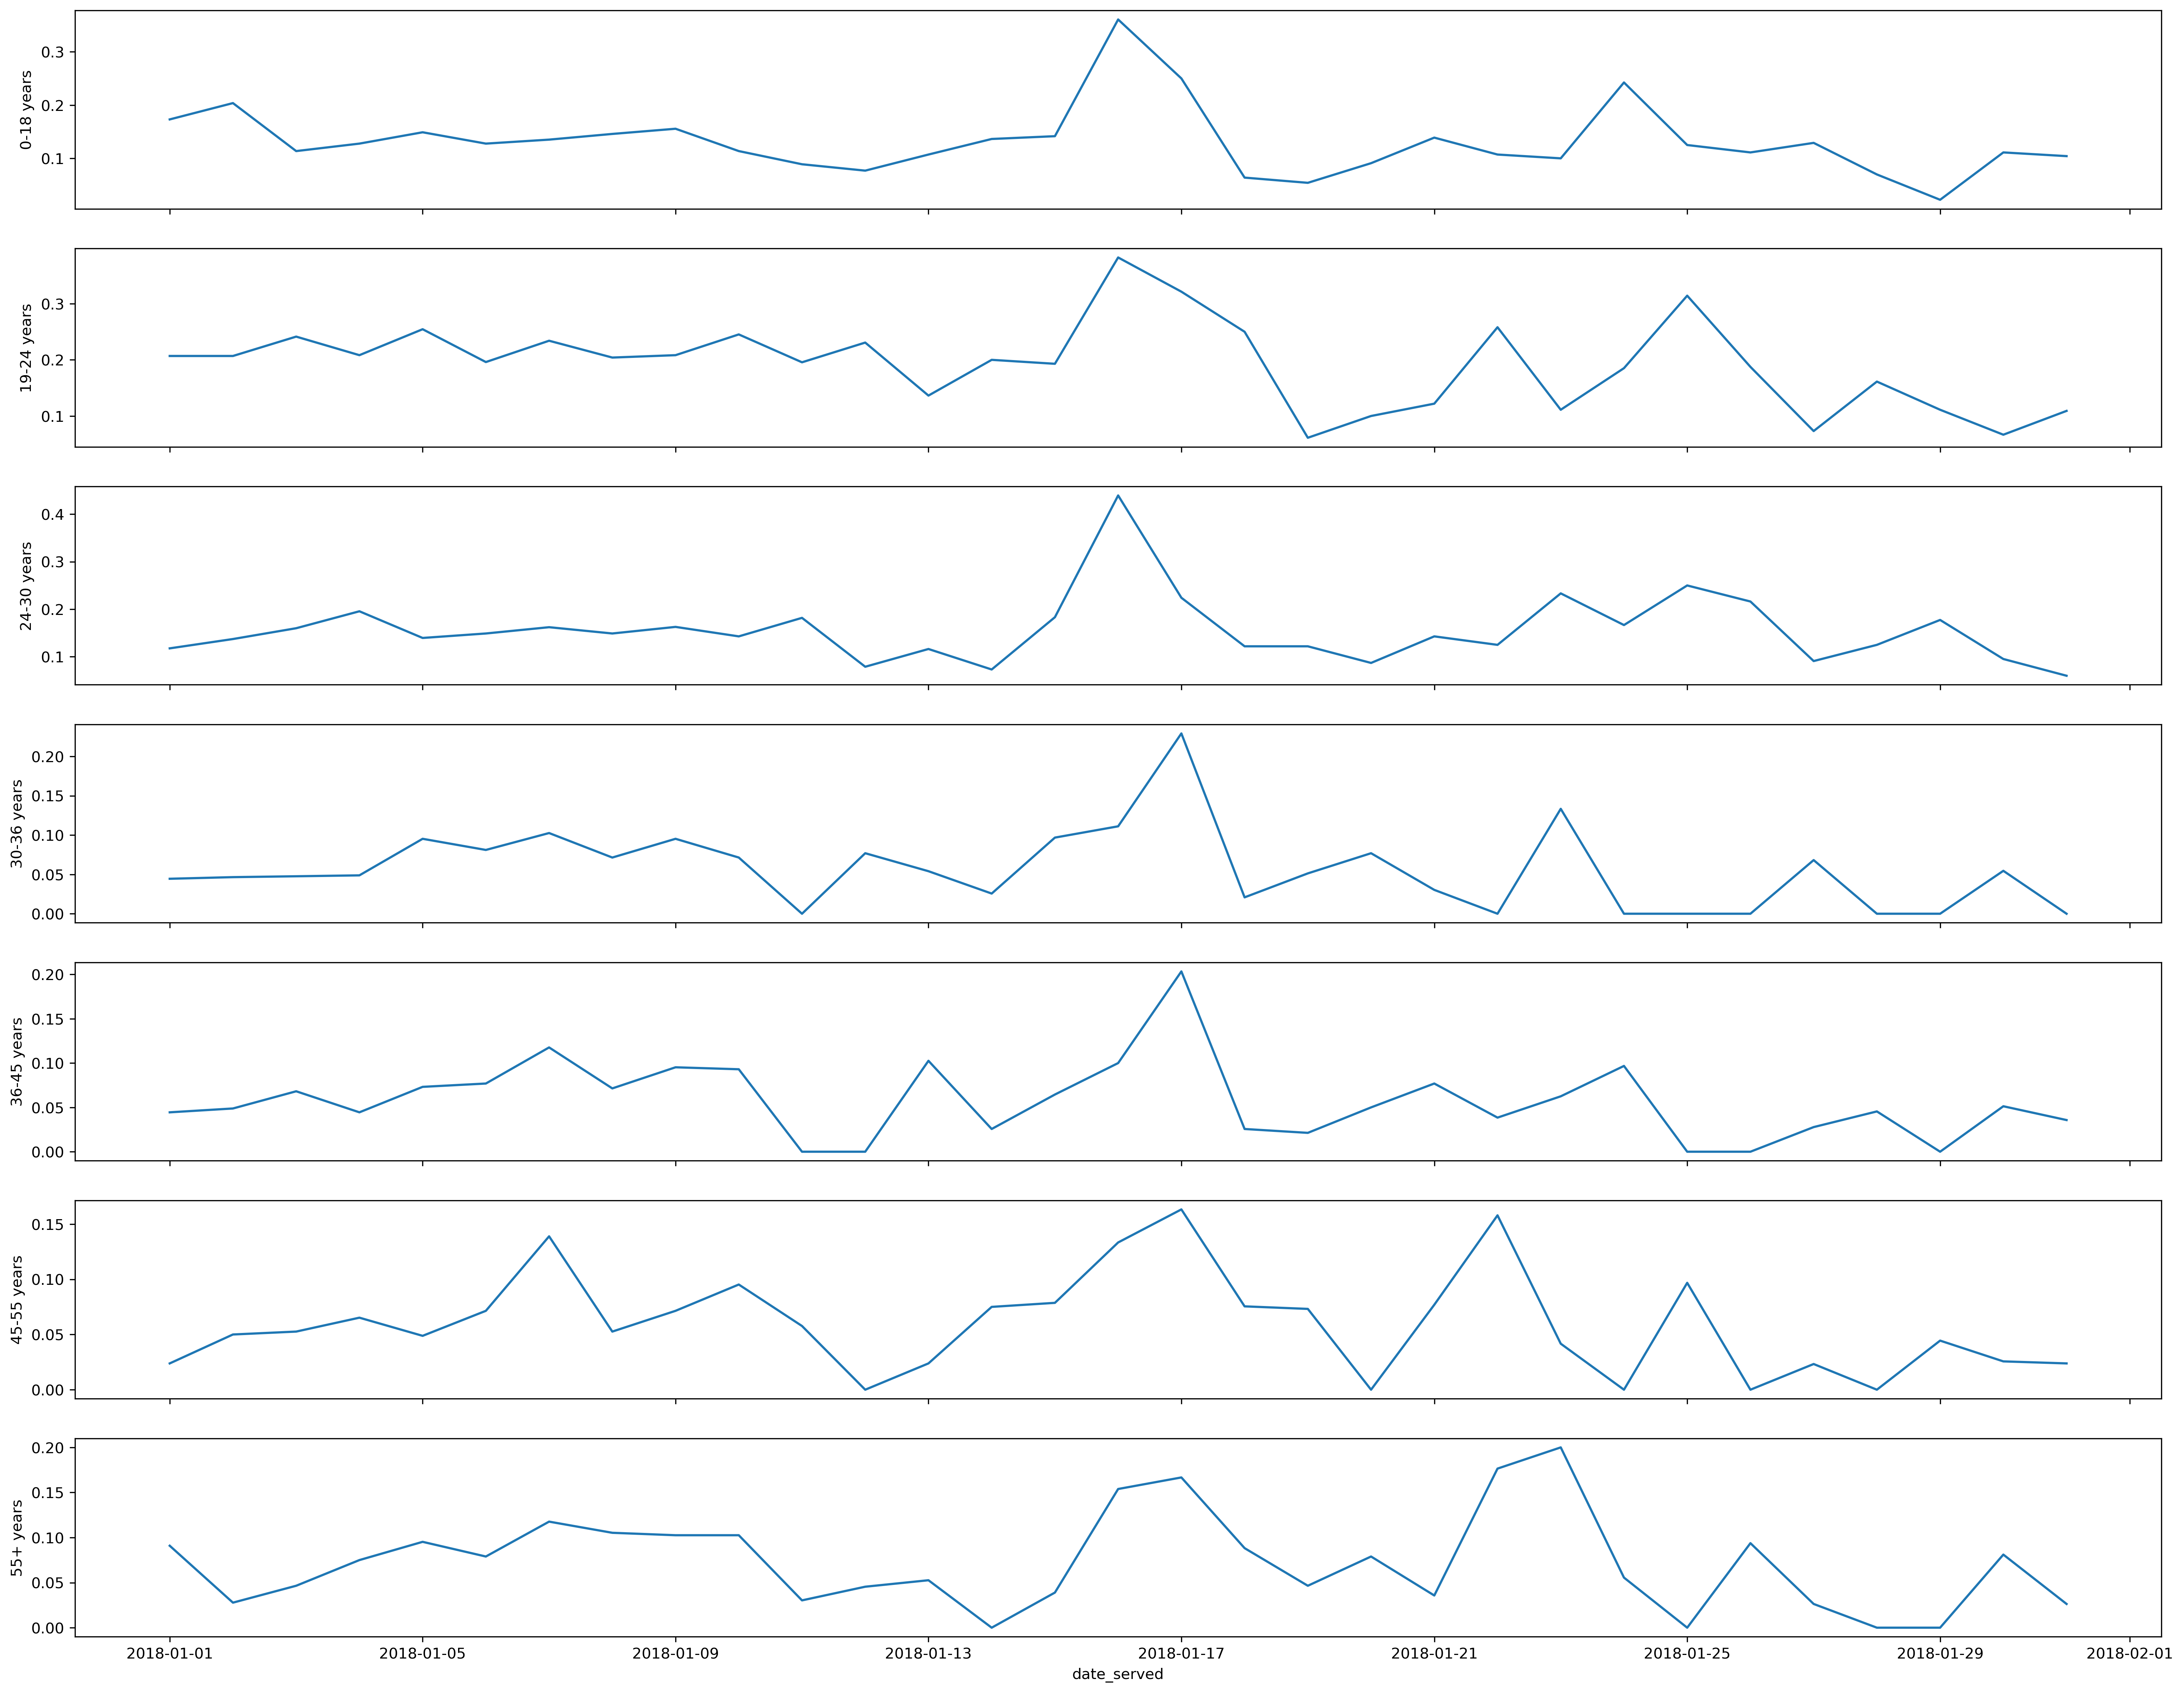

In [61]:
fig, axes = plt.subplots(7, 1, figsize=(25, 20), sharex=True, dpi=300)
i = 0
for age in age_group_df:
    sns.lineplot(age_group_df.index, age_group_df[age], ax=axes[i])
    i+=1

House ads decreased drastically in retention rate on january 11 of 2018.

Check if there is some relation between retention rate and day of the week served.

In [62]:
marketing['day_subscribed'] = marketing['date_subscribed'].dt.dayofweek

In [63]:
marketing['day_served'] = marketing['date_served'].dt.dayofweek

In [64]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,day_subscribed,day_served
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0,0.0


In [65]:
day_served_conv = conversion_rate(marketing, ['day_served', 'marketing_channel'])
day_served_conv = pd.DataFrame(day_served_conv.unstack(level=1))

(0.0, 1.0471311475409837)

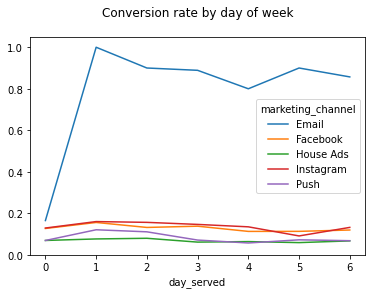

In [66]:
day_served_conv.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)

House Ads conversion rate by language. It could be that the language is the important factor.

In [67]:
house_ads = marketing[marketing['marketing_channel']=='House Ads'].copy()

In [68]:
conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

(0.0, 1.05)

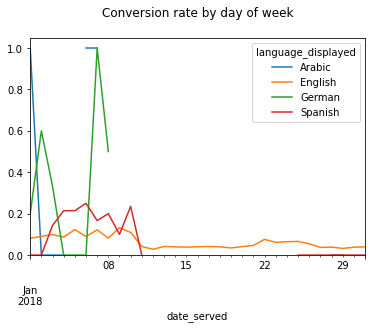

In [69]:
conv_lang_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)

It could be that the language was being presented the wrong way.

In [70]:
house_ads['is_correct_lang'] = np.where(
    house_ads['language_displayed'] == house_ads['language_preferred'], 
    'Yes', 
    'No')

In [71]:
language_check = house_ads.groupby(['date_served', 'is_correct_lang'])['user_id'].count()
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

In [72]:
language_check_df.head()

is_correct_lang,No,Yes
date_served,,
2018-01-01,2.0,173.0
2018-01-02,3.0,168.0
2018-01-03,0.0,166.0
2018-01-04,0.0,156.0
2018-01-05,0.0,153.0


Percentage of language displayed correctly

In [73]:
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

(array([736695., 736699., 736703., 736707., 736711., 736715., 736719.,
        736723., 736726.]),
 <a list of 9 Text major ticklabel objects>)

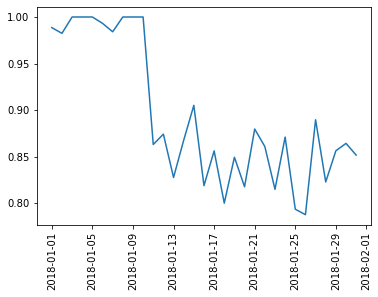

In [74]:
plt.plot(language_check_df.index, language_check_df['pct'])
plt.xticks(rotation=90)

Apparently, the problem was that the users were adds in languages different than the one they preferred.

### Assesment of the impact of the problem

In [75]:
# Conversion rate before the error
house_ads_before_error = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_before_error, ['language_displayed'])

In [76]:
# Comparing conversion rates of different languages with English
spanish_index = lang_conv['Spanish']/lang_conv['English']
print('Spanish: {}'.format(spanish_index))
arabic_index = lang_conv['Arabic']/lang_conv['English']
print('Arabic: {}'.format(arabic_index))
german_index = lang_conv['German']/lang_conv['English']
print('German: {}'.format(german_index))

Spanish: 1.7117171111777045
Arabic: 4.732394366197183
German: 4.206572769953051


In [77]:
language_conversion = house_ads.groupby(['date_served',
                                         'language_preferred']).agg({'user_id':'nunique',
                                                                     'converted':'sum'})

In [78]:
language_conversion

user_id converted
date_served language_preferred                   
2018-01-01  Arabic                    2         2
            English                 159        13
            German                    5         1
            Spanish                   9         0
2018-01-02  Arabic                    3         0
...                                 ...       ...
2018-01-30  Spanish                  16         2
2018-01-31  Arabic                    7         1
            English                 128         4
            German                    4         0
            Spanish                  15         1

[119 rows x 2 columns]

In [79]:
language_conversion = pd.DataFrame(language_conversion.unstack(level=1))

In [80]:
language_conversion.head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   159.0    5.0     9.0         2      13      1   
2018-01-02             3.0   152.0    5.0    10.0         0      14      3   
2018-01-03             2.0   151.0    3.0     7.0         0      15      1   
2018-01-04             2.0   138.0    2.0    14.0         0      12      0   
2018-01-05             NaN   138.0    1.0    14.0       NaN      17  False   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3

In [81]:
language_conversion['true_english_conversions'] = language_conversion.loc['2018-01-11':'2018-01-31'][('converted', 'English')]

In [82]:
language_conversion.loc['2018-01-11':'2018-01-31'].head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-11             7.0   124.0    2.0    13.0         0       6      0   
2018-01-12             3.0   124.0    4.0    11.0         0       3      0   
2018-01-13             6.0   119.0    5.0    15.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   142.0    4.0     9.0         0       6      0   

                           true_english_conversions  
language_preferred Spanish                           
date_served                                          
2018-01-11               0                        6  
2018-01-12               1                        3  
2018-01-13               0                        5  
2018-01-14               0                        6  
2018-01-15               0                        6

In [83]:
# Expected conversion rate for each language without the error
language_conversion['expected_spanish_rate'] = language_conversion['true_english_conversions'] * spanish_index
language_conversion['expected_arabic_rate'] = language_conversion['true_english_conversions'] * arabic_index
language_conversion['expected_german_rate'] = language_conversion['true_english_conversions'] * german_index

In [84]:
language_conversion.loc['2018-01-11':'2018-01-31'].head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-11             7.0   124.0    2.0    13.0         0       6      0   
2018-01-12             3.0   124.0    4.0    11.0         0       3      0   
2018-01-13             6.0   119.0    5.0    15.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   142.0    4.0     9.0         0       6      0   

                           true_english_conversions expected_spanish_rate  \
language_preferred Spanish                                                  
date_served                                                                 
2018-01-11               0                        6               10.2703   
2018-01-12               1                        3               5.13515   
2018-01-13               0                        5               8.55859   
2018-01-14               0                        6               10.2703   
2018-01-15               0                        6               10.2703   

                   expected_arabic_rate expected_german_rate  
language_preferred                                            
date_served                                                   
2018-01-11                      28.3944              25.2394  
2018-01-12                      14.1972              12.6197  
2018-01-13                       23.662              21.0329  
2018-01-14                      28.3944              25.2394  
2018-01-15                      28.3944              25.2394

In [85]:
# Expected number of conversions for each language without error
language_conversion['expected_spanish_conversions'] = language_conversion['expected_spanish_rate']/100 * \
                                                      language_conversion[('user_id', 'Spanish')]
language_conversion['expected_arabic_conversions'] = language_conversion['expected_arabic_rate']/100 * \
                                                     language_conversion[('user_id', 'Arabic')]
language_conversion['expected_german_conversions'] = language_conversion['expected_german_rate']/100 * \
                                                     language_conversion[('user_id', 'German')]

In [86]:
language_conversion.loc['2018-01-11':'2018-01-31'].head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-11             7.0   124.0    2.0    13.0         0       6      0   
2018-01-12             3.0   124.0    4.0    11.0         0       3      0   
2018-01-13             6.0   119.0    5.0    15.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   142.0    4.0     9.0         0       6      0   

                           true_english_conversions expected_spanish_rate  \
language_preferred Spanish                                                  
date_served                                                                 
2018-01-11               0                        6               10.2703   
2018-01-12               1                        3               5.13515   
2018-01-13               0                        5               8.55859   
2018-01-14               0                        6               10.2703   
2018-01-15               0                        6               10.2703   

                   expected_arabic_rate expected_german_rate  \
language_preferred                                             
date_served                                                    
2018-01-11                      28.3944              25.2394   
2018-01-12                      14.1972              12.6197   
2018-01-13                       23.662              21.0329   
2018-01-14                      28.3944              25.2394   
2018-01-15                      28.3944              25.2394   

                   expected_spanish_conversions expected_arabic_conversions  \
language_preferred                                                            
date_served                                                                   
2018-01-11                              1.33514                     1.98761   
2018-01-12                             0.564867                    0.425915   
2018-01-13                              1.28379                     1.41972   
2018-01-14                              1.23244                     1.41972   
2018-01-15                             0.924327                    0.567887   

                   expected_german_conversions  
language_preferred                              
date_served                                     
2018-01-11                            0.504789  
2018-01-12                            0.504789  
2018-01-13                             1.05164  
2018-01-14                            0.757183  
2018-01-15                             1.00958

In [87]:
error_period = language_conversion.loc['2018-01-11':'2018-01-31']

In [88]:
expected_subs = error_period['expected_spanish_rate'].agg('sum') + \
                error_period['expected_arabic_rate'].agg('sum') + \
                error_period['expected_german_rate'].agg('sum')

In [89]:
actual_subs = error_period[('converted', 'Spanish')].sum() + \
              error_period[('converted', 'Arabic')].sum() + \
              error_period[('converted', 'German')].sum()

In [90]:
# Lost subscribers
lost_subs = expected_subs - actual_subs
lost_subs

975.1643192488264

## A/B Testing

In [91]:
email_df = marketing[marketing['marketing_channel'] == 'Email']
allocation = email_df.groupby(['variant'])['user_id'].nunique()

In [92]:
allocation

variant
control            267
personalization    266
Name: user_id, dtype: int64

In [93]:
subscribers = email_df.groupby(['user_id', 'variant'])['converted'].max()

In [94]:
subscribers = pd.DataFrame(subscribers.unstack(level=1))

In [95]:
subscribers.head()

variant,control,personalization
user_id,,
a100000526,NaN,True
a100000530,NaN,True
a100000538,NaN,True
a100000542,NaN,True
a100000546,NaN,True


In [96]:
control = subscribers['control'].dropna()
personalization = subscribers['personalization'].dropna()

In [97]:
# Control conversion rate
control_conv = control.sum()/control.shape[0]

# Control conversion rate
personalization_conv = personalization.sum()/personalization.shape[0]

In [103]:
# Control conversion rate
control_conv = control.mean()

# Control conversion rate
personalization_conv = personalization.mean()

In [104]:
print('Control conversion rate:', control_conv)
print('Personalization conversion rate:', personalization_conv)

Control conversion rate: 0.2846441947565543
Personalization conversion rate: 0.41729323308270677


### Lift analysis

In [105]:
lift = (personalization_conv-control_conv)/control_conv

In [106]:
print(f'Lift: {round(lift*100, 2)}%')

Lift: 46.6%


### T-test

In [108]:
from scipy.stats import ttest_ind
t = ttest_ind(control, personalization)
print(t)

Ttest_indResult(statistic=-3.233881374218041, pvalue=0.0012971299845076245)


There seems to be statisticaly significant differences at the level of alpha=0.01.